# Balance of plant

In [2]:
using Revise
using FUSE
using Plots;

Revise.retry()
FUSE.logging(Logging.Info);

### Initialize FPP v1_demount case
[FPP v1 demount case documentation](https://fuse.help/cases.html#FPP)

In [3]:
ini, act = FUSE.case_parameters(:FPP; version=:v1_demount, init_from=:scalars);
dd = FUSE.init(ini, act; do_plot=false);

### Run Actors that will be needed for balance of plant

In [4]:
dd.build.structure
FUSE.ActorCXbuild(dd, act)
FUSE.ActorNeutronics(dd, act; do_plot=false);
FUSE.ActorDivertors(dd, act)
FUSE.ActorBlanket(dd, act);

### Running the simple brayton cycle
Run the balance of plant actor, with for the simple case of "brayton only", this is a generalized power cycle which does not optimize itself depending on the configuration

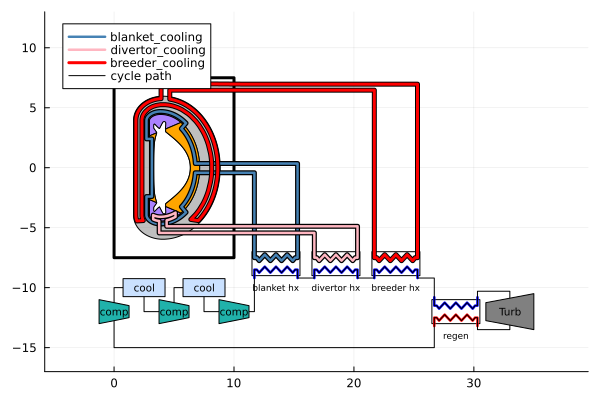

IHTS
├─ blanket
│  ├─ HX_outlet_temperature ➡ [638.035] [K]
│  ├─ circulator_power ➡ [1.22207e+07] [W]
│  ├─ flow_rate ➡ [267.817] [kg/s]
│  ├─ heat_delivered ➡ [0] [W]
│  ├─ heat_load ➡ [1.06146e+08] [W]
│  ├─ heat_waste ➡ [1.18366e+08] [W]
│  ├─ inlet_temperature ➡ [646.823] [K]
│  ├─ outlet_temperature ➡ [723.15] [K]
│  └─ working_fluid ➡ "helium"
├─ breeder
│  ├─ HX_outlet_temperature ➡ [823.15] [K]
│  ├─ circulator_power ➡ [238461] [W]
│  ├─ flow_rate ➡ [6151.43] [kg/s]
│  ├─ heat_delivered ➡ [4.70072e+08] [W]
│  ├─ heat_load ➡ [6.258e+08] [W]
│  ├─ heat_waste ➡ [1.55967e+08] [W]
│  ├─ inlet_temperature ➡ [823.213] [K]
│  ├─ outlet_temperature ➡ [1373.15] [K]
│  └─ working_fluid ➡ "pbli"
└─ divertor
   ├─ HX_outlet_temperature ➡ [826.712] [K]
   ├─ circulator_power ➡ [1.58346e+07] [W]
   ├─ flow_rate ➡ [267.817] [kg/s]
   ├─ heat_delivered ➡ [1.12466e+08] [W]
   ├─ heat_load ➡ [1.18278e+08] [W]
   ├─ heat_waste ➡ [2.16475e+07] [W]
   ├─ inlet_temperature ➡ [838.098] [K]
   ├─ outl

thermal_cycle
├─ cycle_net_work ➡ [1.065e+08] [W]
├─ cycle_work_input ➡ [2.2787e+08] [W]
├─ cycle_work_output ➡ [3.3437e+08] [W]
├─ mass_flow_rate ➡ [267.817] [kg/s]
├─ power_electric_generated ➡ [9.585e+07]
├─ power_thermal_convertable_total ➡ Function [W]
├─ thermal_effeciency ➡ [0.302909] [Fraction]
├─ thermal_electric_conversion_efficiency ➡ [0.9]
└─ total_heat_power ➡ [5.82537e+08] [W]


In [16]:
empty!(dd.balance_of_plant)
FUSE.ActorBalanceOfPlant(dd, act; cycle_model="brayton_only", do_plot = true);
dd.balance_of_plant.IHTS
display(dd.balance_of_plant.IHTS)
display(dd.balance_of_plant.thermal_cycle)

### Running the complex_brayton file
[ActorBalanceOfPlant documentation](https://fuse.help/actors.html#BalanceOfPlant)
Run the balance of plant with the model "complex_brayton". This configuration modifies the component order and operating temperatures to minimize the heat waste. For this case, the complex_brayton model has a thermal effeciency of 45%. 
This model relies on high operating temperatures

"Adjusting preset max cycle temperature"

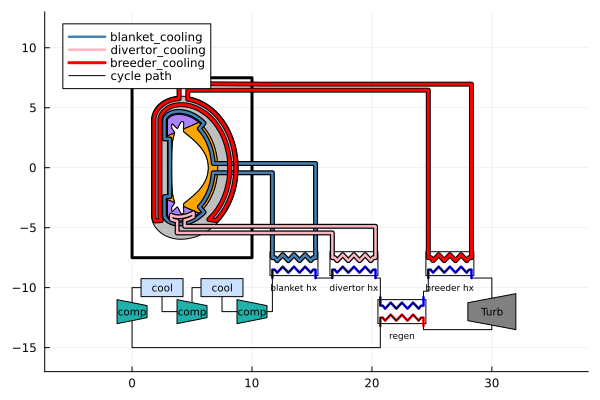

IHTS
├─ blanket
│  ├─ HX_outlet_temperature ➡ [371.819] [K]
│  ├─ circulator_power ➡ [8.0019e+06] [W]
│  ├─ flow_rate ➡ [267.817] [kg/s]
│  ├─ heat_delivered ➡ [1.13267e+08] [W]
│  ├─ heat_load ➡ [1.06146e+08] [W]
│  ├─ heat_waste ➡ [880209] [W]
│  ├─ inlet_temperature ➡ [376.94] [K]
│  ├─ outlet_temperature ➡ [453.267] [K]
│  └─ working_fluid ➡ "helium"
├─ breeder
│  ├─ HX_outlet_temperature ➡ [840.519] [K]
│  ├─ circulator_power ➡ [238461] [W]
│  ├─ excess_temperature ➡ [70.2619] [K]
│  ├─ flow_rate ➡ [6151.43] [kg/s]
│  ├─ heat_delivered ➡ [5.52949e+08] [W]
│  ├─ heat_load ➡ [6.258e+08] [W]
│  ├─ heat_waste ➡ [7.30686e+07] [W]
│  ├─ inlet_temperature ➡ [770.32] [K]
│  ├─ outlet_temperature ➡ [1373.34] [K]
│  └─ working_fluid ➡ "pbli"
└─ divertor
   ├─ HX_outlet_temperature ➡ [454.362] [K]
   ├─ circulator_power ➡ [9.77832e+06] [W]
   ├─ flow_rate ➡ [267.817] [kg/s]
   ├─ heat_delivered ➡ [1.26981e+08] [W]
   ├─ heat_load ➡ [1.18278e+08] [W]
   ├─ heat_waste ➡ [1.07562e+06] [W]
   ├─

thermal_cycle
├─ cycle_net_work ➡ [3.14327e+08] [W]
├─ cycle_work_input ➡ [2.2787e+08] [W]
├─ cycle_work_output ➡ [5.42197e+08] [W]
├─ mass_flow_rate ➡ [267.817] [kg/s]
├─ power_electric_generated ➡ [2.82894e+08]
├─ power_thermal_convertable_total ➡ Function [W]
├─ thermal_effeciency ➡ [0.396278] [Fraction]
├─ thermal_electric_conversion_efficiency ➡ [0.9]
└─ total_heat_power ➡ [7.93197e+08] [W]


str = "convergance met"


In [17]:
empty!(dd.balance_of_plant)
FUSE.ActorBalanceOfPlant(dd, act; cycle_model="complex_brayton", do_plot = true);
display(dd.balance_of_plant.IHTS)
display(dd.balance_of_plant.thermal_cycle)